In [304]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
# 交叉验证 : 得出最好的模型深度max_depth
from sklearn.model_selection import cross_val_score

In [305]:
# 1.清洗数据
df = pd.read_csv('Python算法\机器学习实践项目(自做)\实践项目数据\diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [306]:
float_Insulin_mean=df.loc[df['Insulin']!=0,'Insulin'].mean()
int_Insulin_mean=int(round(float_Insulin_mean))
df.loc[df['Insulin']==0,'Insulin']=int_Insulin_mean
float_SkinThickness_mean=df.loc[df['SkinThickness']!=0,'SkinThickness'].mean()
int_SkinThickness_mean=int(round(float_SkinThickness_mean))
df.loc[df['SkinThickness']==0,'SkinThickness']=int_SkinThickness_mean
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,156,33.6,0.627,50,1
1,1,85,66,29,156,26.6,0.351,31,0
2,8,183,64,29,156,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,156,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,29,156,30.1,0.349,47,1


In [307]:
# 2.确认数据X和y
X=df[['Glucose','BloodPressure','BMI','DiabetesPedigreeFunction','Age']]
y=df['Outcome']

In [308]:
# 3.拆分训练集和测试集
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [309]:
# 4.利用交叉验证求出最合适的max_depth
scores=[]
depths=(1,10)
for i in depths:
    model = DecisionTreeClassifier(max_depth=i,random_state=42)
    score = np.mean(cross_val_score(model,X_train,y_train,cv=5))
    scores.append(score)
beat_depths=depths[np.argmax(score)]
print("最佳深度为:",beat_depths)

最佳深度为: 1


In [310]:
# 5.定义决策树模型 并且训练
model = DecisionTreeClassifier(max_depth=1)
model.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [311]:
# 6.预测测试集 并且评估模型的准确率
y_pred=model.predict(X_test)
accuracy_scores=accuracy_score(y_pred,y_test)
accuracy_scores

0.7402597402597403

Text(0.5, 1.0, '预测糖尿病')

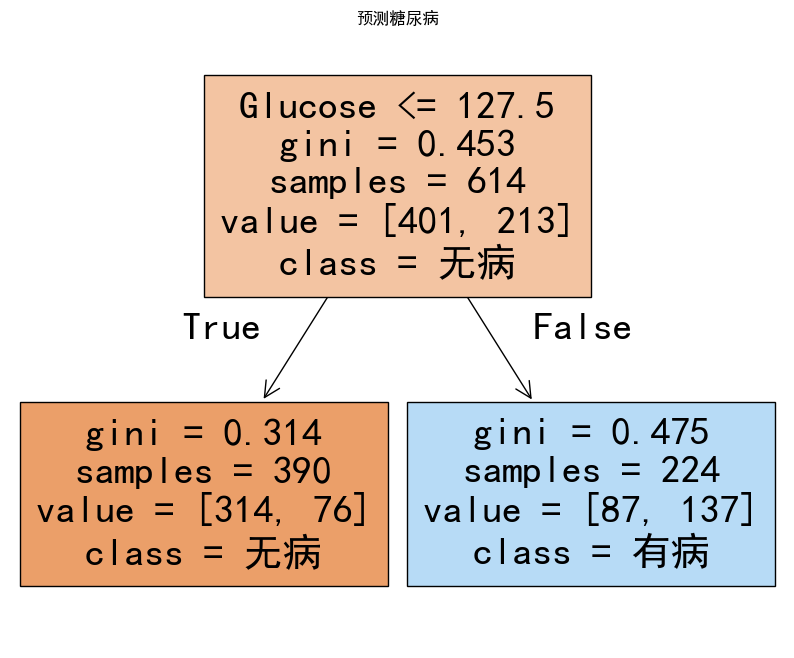

In [312]:
#可视化决策树
plt.rcParams['font.sans-serif'] = ['SimHei']  #用来正常显示中文标签"
plt.rcParams['axes.unicode_minus'] = False  #用来正常显示负号"
plt.figure(figsize=(10,8))
plot_tree(model,filled=True,feature_names=['Glucose','BloodPressure','BMI','DiabetesPedigreeFunction','Age'],class_names=["无病","有病"])
plt.title("预测糖尿病")